The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.

https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/cohorts/2024/01-intro/homework.md

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [58]:
from sklearn.feature_extraction import DictVectorizer

# Q1. Downloading the data

Download the data ["Yellow Taxi Trip Records"](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page) for January and February 2023. Read the data for January. 

In [22]:
url_yellow_jan_2023 = 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet'
url_yellow_feb_2023 = 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet'

In [23]:
df = pd.read_parquet(url_yellow_jan_2023)
print(df.shape)
df.head()

(3066766, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [25]:
df['VendorID'].value_counts()

2    2239399
1     827367
Name: VendorID, dtype: int64

How many columns are there?

In [52]:
df.shape[1]

20

__Answer:__ there are 19 columns

# Q2. Computing duration

Now let's compute the duration variable. It should contain the duration of a ride in minutes.

In [35]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].apply(lambda x: x.total_seconds() / 60)

What's the standard deviation of the trips duration in January?

In [41]:
df['duration'].std()

42.594351241920904

__Answer:__ 42.59

# Q3. Dropping outliers

Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

(3009173, 20)


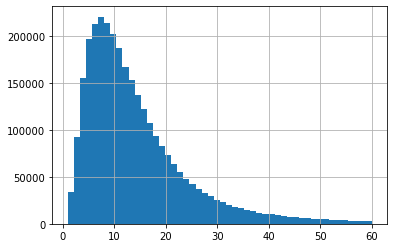

In [49]:
df_filtered = df.query('duration >= 1 and duration <= 60').copy()
print(df_filtered.shape)
df_filtered['duration'].hist(bins=50);

What fraction of the records left after you dropped the outliers?

In [56]:
len(df_filtered) / len(df)

0.9812202822125979

__Answer__: 98%

# Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

* Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
* Fit a dictionary vectorizer
* Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?